In [73]:
from model import ChoiceModel

import pandas as pd


def evaluate_gl(desire, choice_type, num_sample=1000, seed=42):
    choice_model = ChoiceModel(
        data_dir='data', desire=desire, choice_type=choice_type,
        sample_num=num_sample, skip_init=True, seed=seed)

    error, kl_divergence = choice_model.evaluate(figsize=(20, 3), plot=False)
    return error, kl_divergence

In [74]:
# Visualize the results

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FixedLocator, FixedFormatter


def plot_df(df, desire):
    # Set the style for academic papers
    custom_colors = ["#66AAD4", "#bcebdf"]

    sns.set_theme(style="white", palette=custom_colors, font_scale=1.2)

    # Create a figure and a set of subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
    # Plot error on the first subplot
    sns.barplot(x='num_sample', y='error', hue='choice_type', data=df, ax=ax1)
    ax1.set_xlabel('')
    ax1.xaxis.set_major_locator(FixedLocator([0, 1]))
    ax1.xaxis.set_major_formatter(FixedFormatter(['PL (sample=0)', 'GL (sample=1000)']))
    ax1.set_ylabel(desire, fontweight='bold', fontsize=20)
    ax1.set_title('MAPE(%)', fontweight='bold', fontsize=20)
        
    # Plot KL divergence on the second subplot
    sns.barplot(x='num_sample', y='kl_divergence', hue='choice_type', data=df, ax=ax2)
    ax2.set_xlabel('')
    ax2.xaxis.set_major_locator(FixedLocator([0, 1]))
    ax2.xaxis.set_major_formatter(FixedFormatter(['PL (sample=0)', 'GL (sample=1000)']))
    ax2.set_ylabel('')
    ax2.set_title('KLD', fontweight='bold', fontsize=20)

    # Adjust the legends
    ax1.legend(loc='upper right', title='Choice Type')
    ax2.legend(loc='upper right', title='Choice Type')

    plt.tight_layout()
    plt.savefig(f'results/pl_vs_gl({desire}).png')
    plt.show()

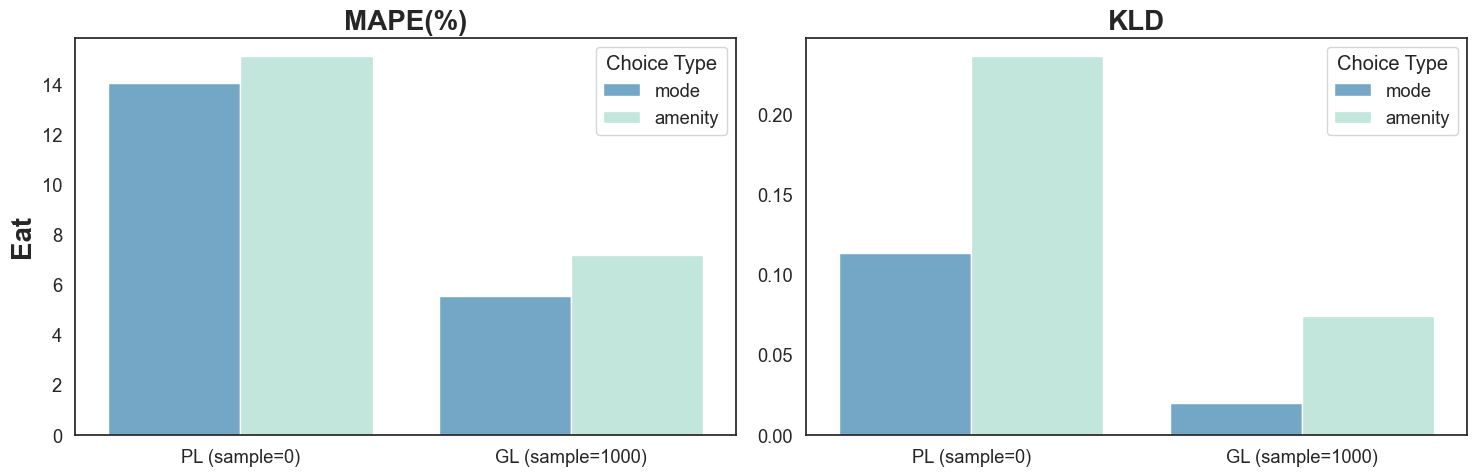

In [75]:
eat_df = pd.DataFrame(columns=['desire', 'choice_type', 'num_sample', 'error', 'kl_divergence'])

desire = 'Eat'
for choice_type in ['mode','amenity']:
    for i,num_sample in enumerate([0,1000]):
        error, kl_divergence = evaluate_gl(desire, choice_type, num_sample=num_sample)
        eat_df.loc[len(eat_df)] = [desire, choice_type, num_sample, error['mean'], kl_divergence['mean']]

plot_df(eat_df,desire)

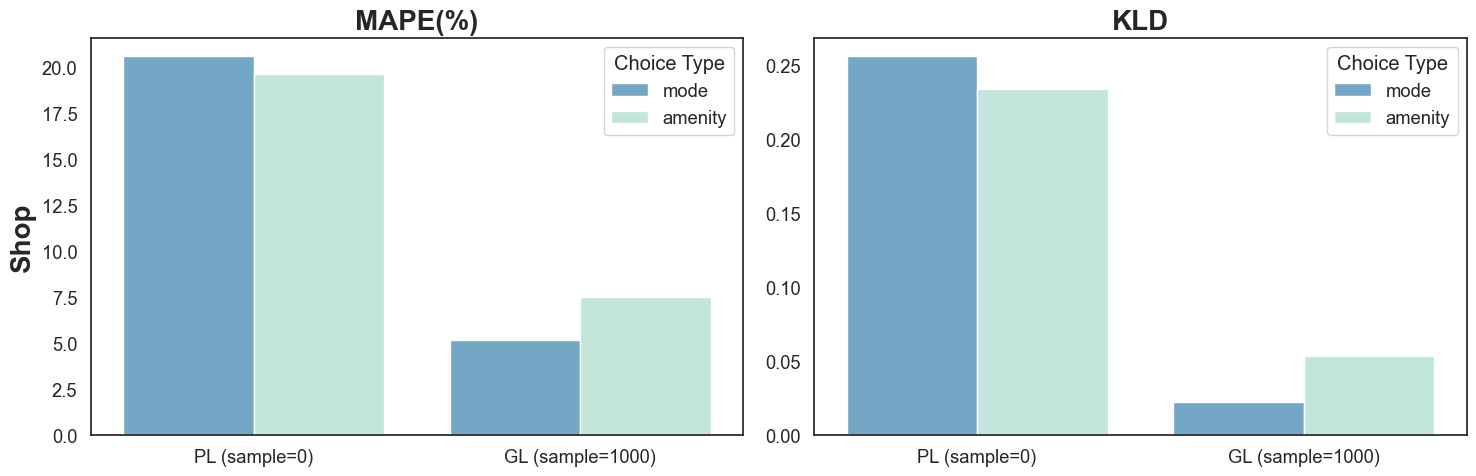

In [76]:
shop_df = pd.DataFrame(columns=['desire', 'choice_type', 'num_sample', 'error', 'kl_divergence'])

desire = 'Shop'
for choice_type in ['mode','amenity']:
    for i,num_sample in enumerate([0,1000]):
        error, kl_divergence = evaluate_gl(desire, choice_type, num_sample=num_sample)
        shop_df.loc[len(shop_df)] = [desire, choice_type, num_sample, error['mean'], kl_divergence['mean']]

plot_df(shop_df,desire)

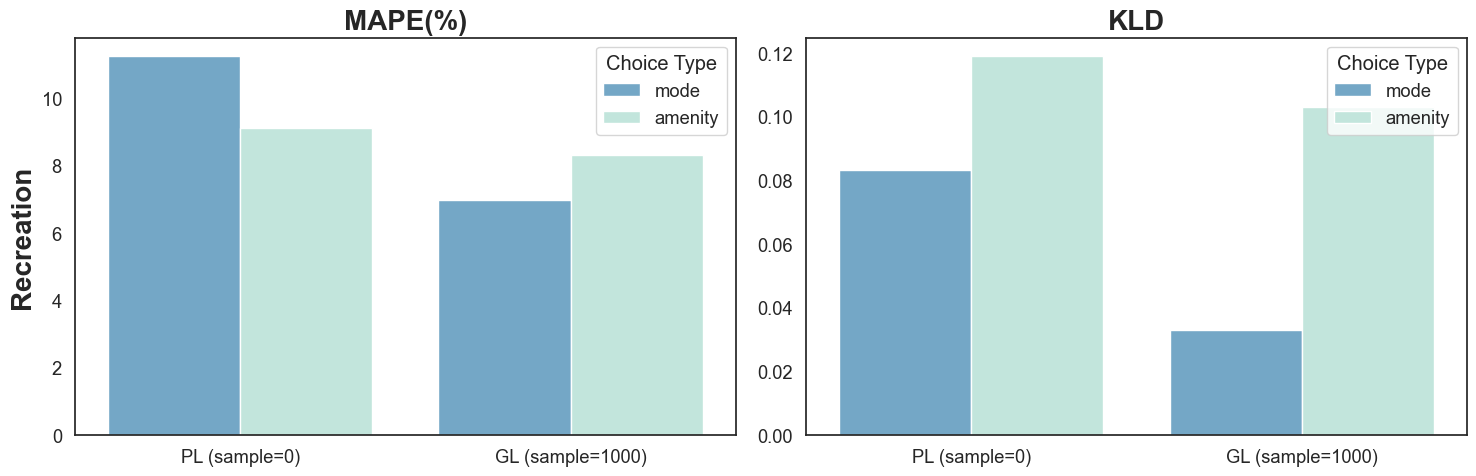

In [77]:
recreation_df = pd.DataFrame(columns=['desire', 'choice_type', 'num_sample', 'error', 'kl_divergence'])

desire = 'Recreation'
for choice_type in ['mode','amenity']:
    for i,num_sample in enumerate([0,1000]):
        error, kl_divergence = evaluate_gl(desire, choice_type, num_sample=num_sample)
        recreation_df.loc[len(recreation_df)] = [desire, choice_type, num_sample, error['mean'], kl_divergence['mean']]

plot_df(recreation_df,desire)

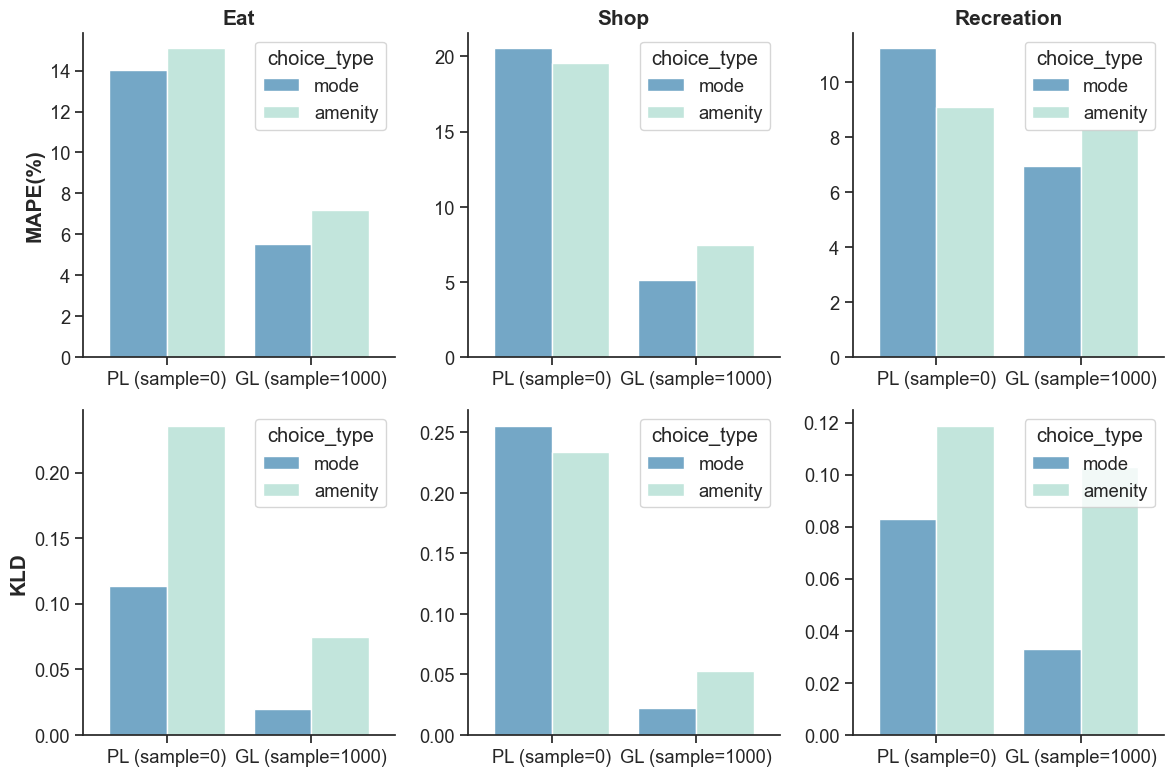

In [78]:
# Visualize the results

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FixedLocator, FixedFormatter


dfs = [eat_df, shop_df, recreation_df]

desires = ['Eat', 'Shop', 'Recreation']

def combine_plot():
    # Set the style for academic papers
    custom_colors = ["#66AAD4", "#bcebdf"]
    # custom_colors = ["#66AAD4","#deacb8"]

    sns.set_theme(style="ticks", palette=custom_colors, font_scale=1.2)

    # Create a figure and a set of subplots
    fig, axes = plt.subplots(2, len(dfs), figsize=(12, 8))

    label_size = 15
    margin = 0.1

    for i, (df,desire) in enumerate(zip(dfs, desires)):

        # Plot error on the first row
        ax1 = axes[0, i]
        sns.barplot(x='num_sample', y='error', hue='choice_type', data=df, ax=ax1)
        ax1.set_xlabel('')
        ax1.xaxis.set_major_locator(FixedLocator([0, 1]))
        ax1.xaxis.set_major_formatter(FixedFormatter(['PL (sample=0)', 'GL (sample=1000)']))
        if i == 0:
            ax1.set_ylabel('MAPE(%)', fontweight='bold', fontsize=label_size)
        else:
            ax1.set_ylabel('')
        ax1.set_title(desire, fontweight='bold', fontsize=label_size)
        ax1.margins(x=margin)

        # Plot KL divergence on the second row
        ax2 = axes[1, i]
        sns.barplot(x='num_sample', y='kl_divergence', hue='choice_type', data=df, ax=ax2)
        ax2.set_xlabel('')
        ax2.xaxis.set_major_locator(FixedLocator([0, 1]))
        ax2.xaxis.set_major_formatter(FixedFormatter(['PL (sample=0)', 'GL (sample=1000)']))
        if i == 0:
            ax2.set_ylabel('KLD', fontweight='bold', fontsize=label_size)
        else:
            ax2.set_ylabel('')
        ax2.set_title('', fontweight='bold', fontsize=label_size)
        ax2.margins(x=margin)
        # Adjust the legends
        # ax1.legend(loc='upper right', title='Choice Type')
        # ax2.legend(loc='upper right', title='Choice Type')
    sns.despine()
    plt.tight_layout()
    plt.savefig(f'results/pl_vs_gl_2.png')
    plt.show()

combine_plot()